# TSIA202a - Second Practice Session : Spectral density estimation and periodogram Pierre MONROUX Manel WAFRA
The goal of this second session is to provide a power spectral density estimator of a real, zero-mean, weakly stationary process $X_t$. We suppose that we have access to $n$ observations and we will use the FFT algorithm (that implements the DFT) using `numpy.fft.module`.
Recall (from the course) that the periodogram of the observations $X_0, \dots, X_{n-1}$ can be given as:
$$
I_n(\lambda) = \frac{1}{2\pi n}|\sum_{k=0}^{n-1} X_k e^{i\lambda k}|^2
$$

Moreover, the Hertglotz theorem provides a relation between the empirical autocovariance $\hat{\gamma}_n$ and the periodogram $I_n$:
$$
\hat{\gamma}_n(k) = \int_{0}^{2\pi}e^{i\lambda k}I_n({\lambda})d\lambda
$$

1. For a given $m \geq n$  we denote also the DFT as:
$$
DFT(X,m)(k) = \sum_{h=0}^{n-1}X_he^{-2i\pi\frac{kh}{m}}
$$
Show the following relation: 
$$I_n(\frac{2\pi k}{m}) = \frac{1}{2\pi n} |DFT(X,m)(k)|^2$$
2. provide a script that compute those $I_n(\frac{2\pi k}{m})$ for the time series mentioned in the first practice session
3. Show that $I_n(\lambda) = \frac{1}{2\pi} \sum_{k=0}^{n-1} \hat{\gamma}_n(k)e^{-i\lambda k}$
4. How to choose $m$ in order to get a simple relation between $\hat{\gamma}_n(k)$ and $I_n(\frac{2\pi k}{m})$ ? At the end, given a specific $\tilde{m}$ show that:
$$
\hat{\gamma}_n(k) = \frac{1}{n} IDFT\left(\left|DFT(X, \tilde{m})\right|^2, \tilde{m}\right)(k)
$$ Try this estimator on the autocovariance of previous time series of the first session.

5. In the case of white noise, estimate the variance of the periodogram for several values of $n$ and discuss about it.




QUESTION 1

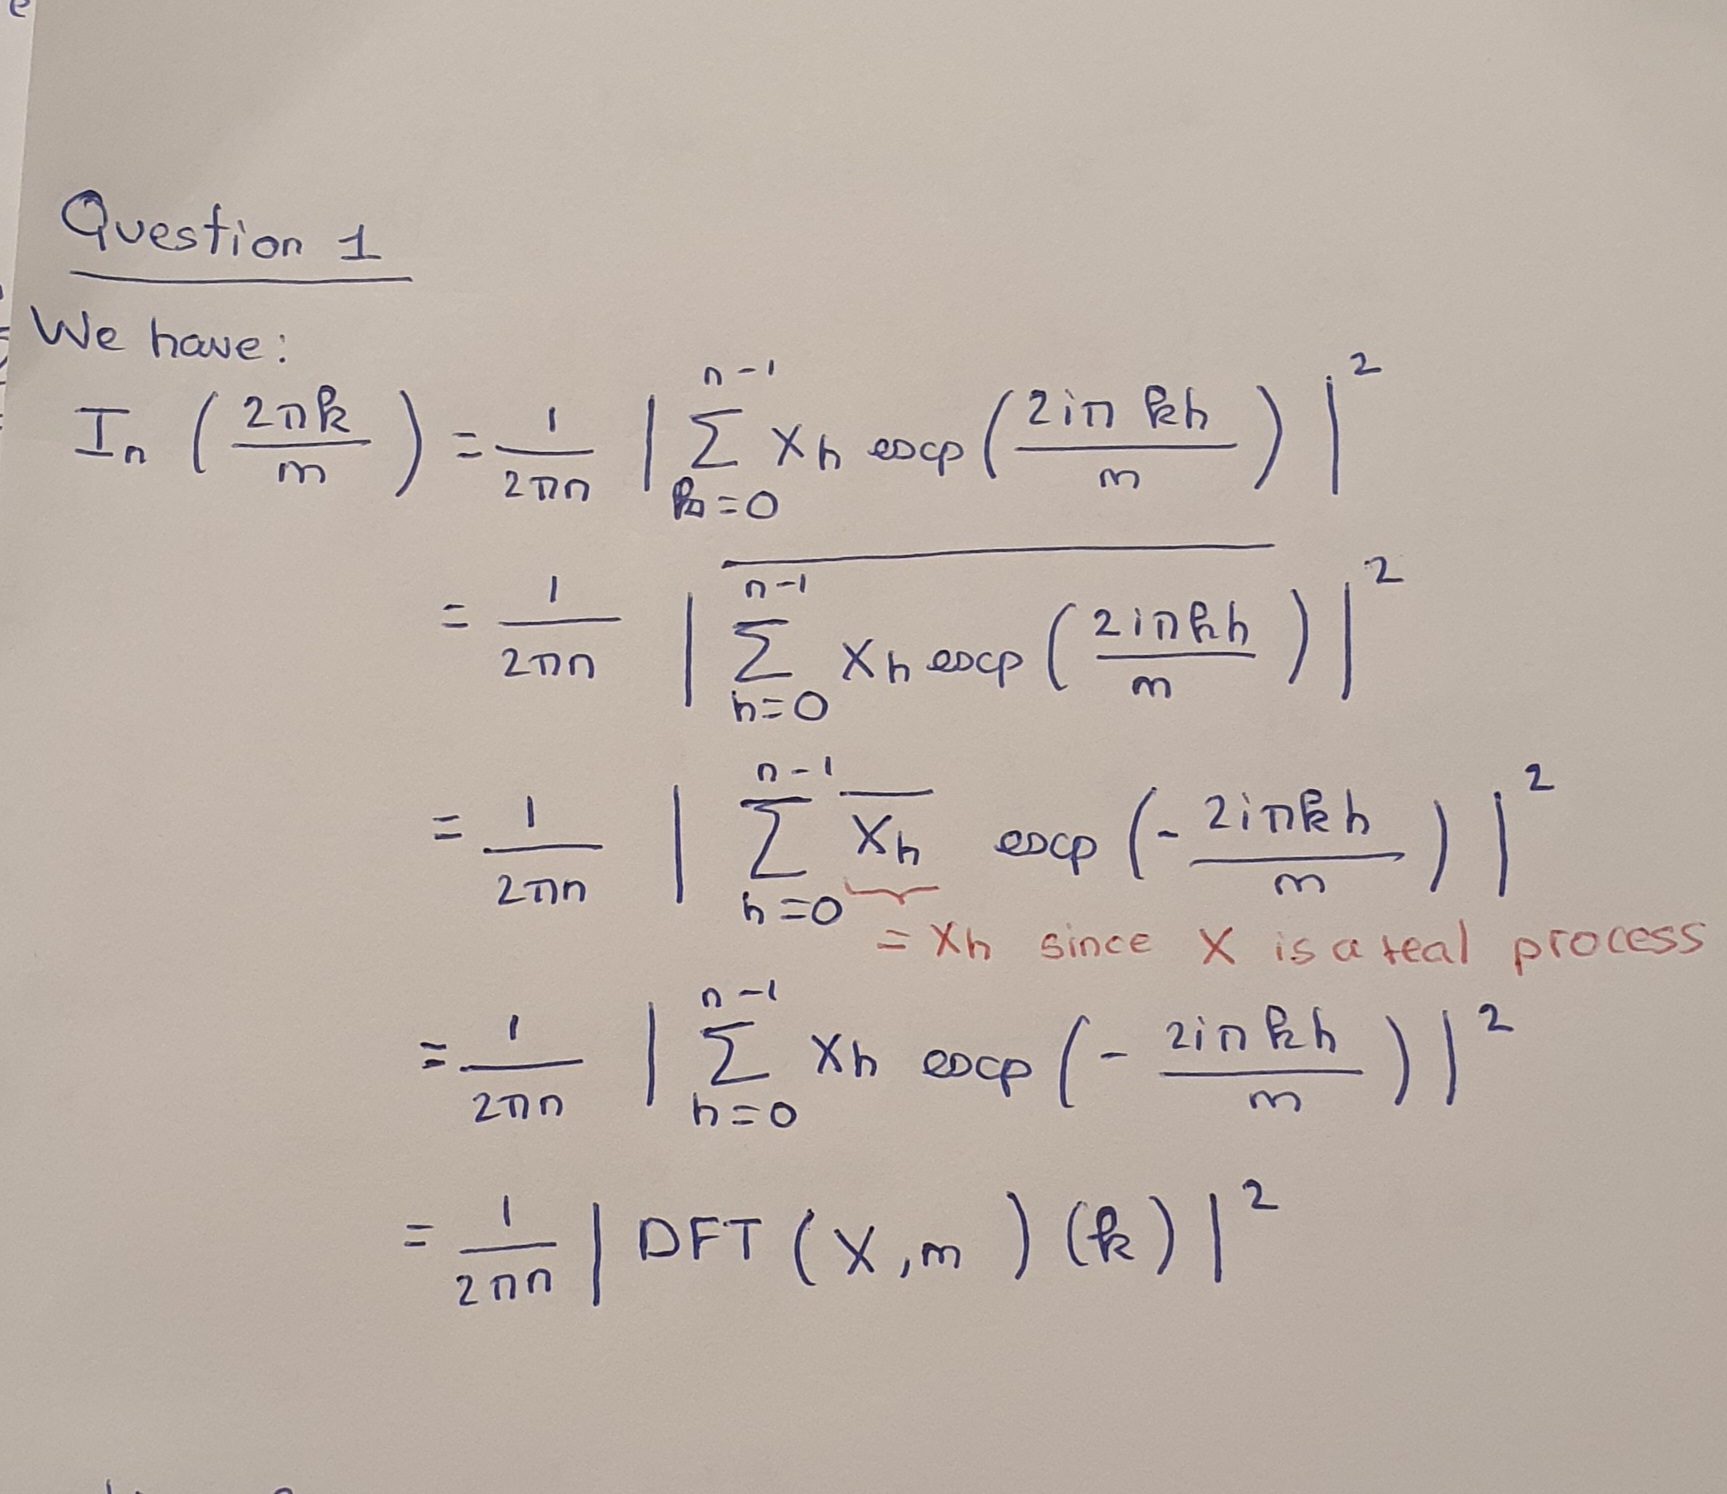

In [5]:

from IPython.display import Image
image_path =r'C:\Users\manel\OneDrive\Documents\2A\tsia\tp2_monroux_wafra\q1.jpg' #'photo1.jpg'
Image(filename=image_path , width=300, height=200)


QUESTION 2

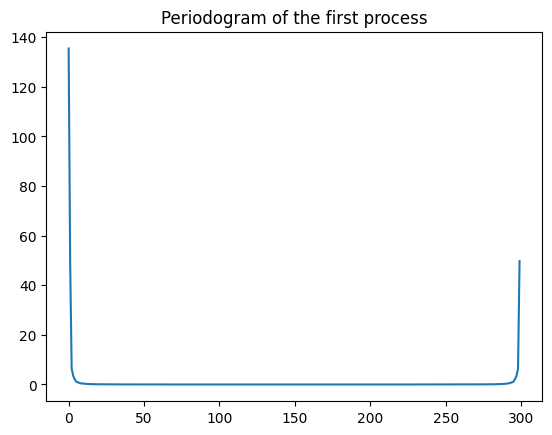

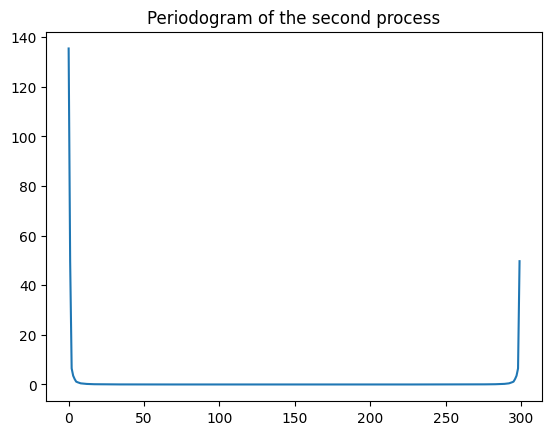

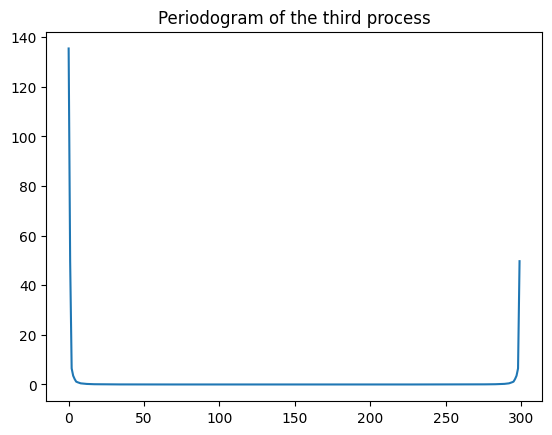

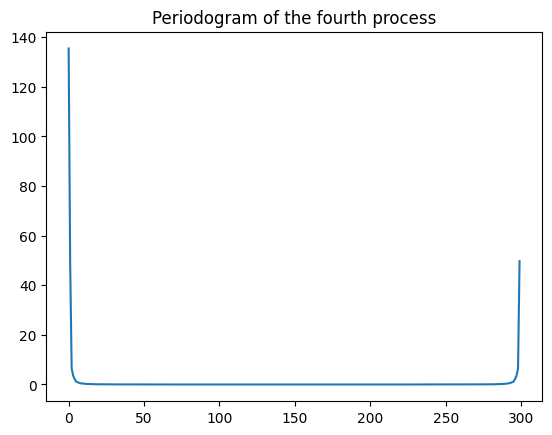

In [25]:
import numpy as np
import matplotlib.pyplot as plt






#let's compute the 4 processes defined in the first practice session

# first variable: white noise
sigma= 1
def  compute_first_variable(n) :
    return np.random.normal(loc=0, scale=np.sqrt(sigma**2), size=n)

# second variable


def compute_second_variable(n) :
    Z=compute_first_variable(n)
    a = 1
    b= 10
    X = [a + b*Z[0]]
    for t in range(1,n) : 
        X.append(a + b*Z[t] + Z[t-1])
    return X

#third variable

 
def compute_third_variable(n) :
    Z=compute_first_variable(n)
    K=1000
    X = []
    for t in range(n) :
        S = a
        for k in range(K + 1) :
            if(t>=k) :
                S += 2**(-k) * Z[t-k]
        X.append(S)
    return X

# fourth variable


def compute_fourth_variable(n) :
    Z=compute_first_variable(n)
    A0=1
    lamb=np.pi/2
    phi = np.random.uniform(0, 2*np.pi)
    X = []
    for t in range(n) :
        X.append(A0*np.cos(lamb*t + phi) + Z[t])
    return X

def compute_I(process, m):
    n= len(process)
    X=[2*np.pi/300*k for k in range(0, n-1)]
    return (X,(1/(2*np.pi*n)*np.abs(np.fft.fft(X, m))**2))

#let's plot the histograms of the 4 processes


X1 = compute_first_variable(200)
_, P1 = compute_I(X1,300)
X2 = compute_second_variable(200)
_,P2 = compute_I(X2,300)
X3 = compute_third_variable(200)
_,P3 = compute_I(X3,300)
X4 = compute_fourth_variable(200)
_,P4 = compute_I(X4,300)
fig, ax = plt.subplots()


plt.title('Periodogram of the first process')
plt.plot(P1)
fig, ax = plt.subplots()
plt.title('Periodogram of the second process')
plt.plot(P2)
fig, ax = plt.subplots()
plt.title('Periodogram of the third process')
plt.plot(P3)
fig, ax = plt.subplots()
plt.title('Periodogram of the fourth process')
plt.plot(P4)

QUESTION 3



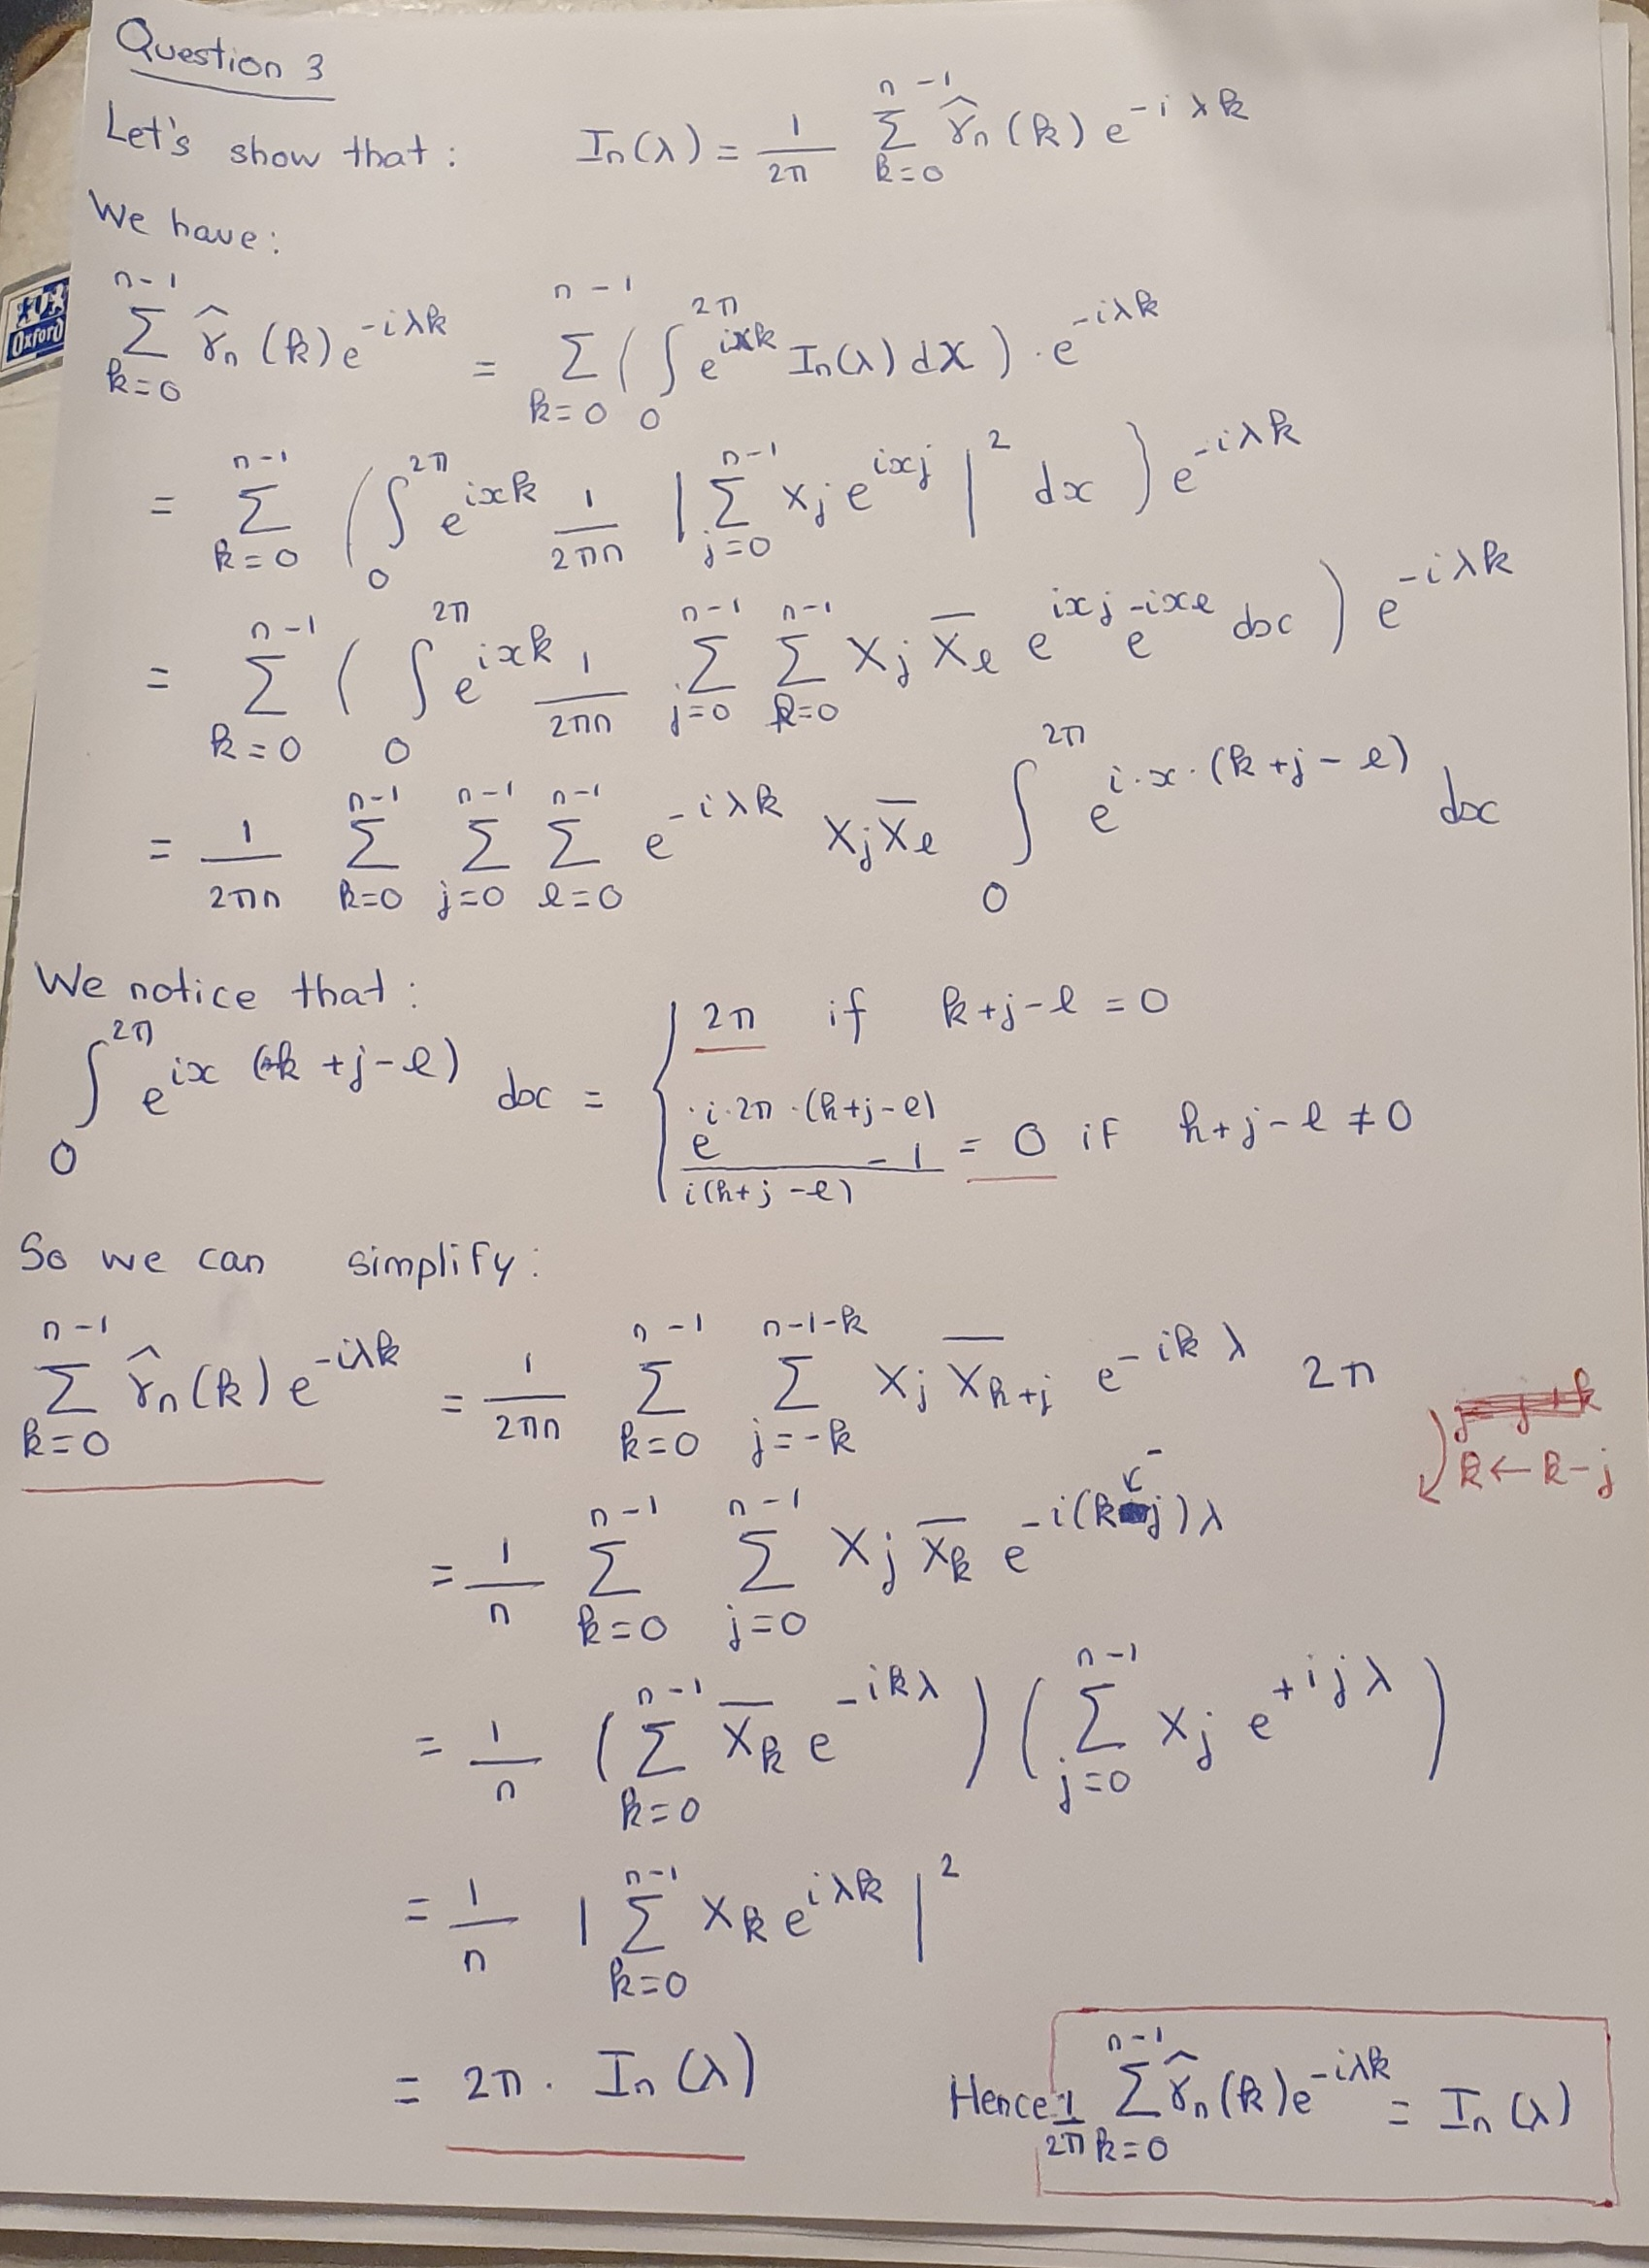

In [6]:

from IPython.display import Image
image_path =r'C:\Users\manel\OneDrive\Documents\2A\tsia\tp2_monroux_wafra\q3.jpg' 
Image(filename=image_path , width=300, height=200)

QUESTION 4



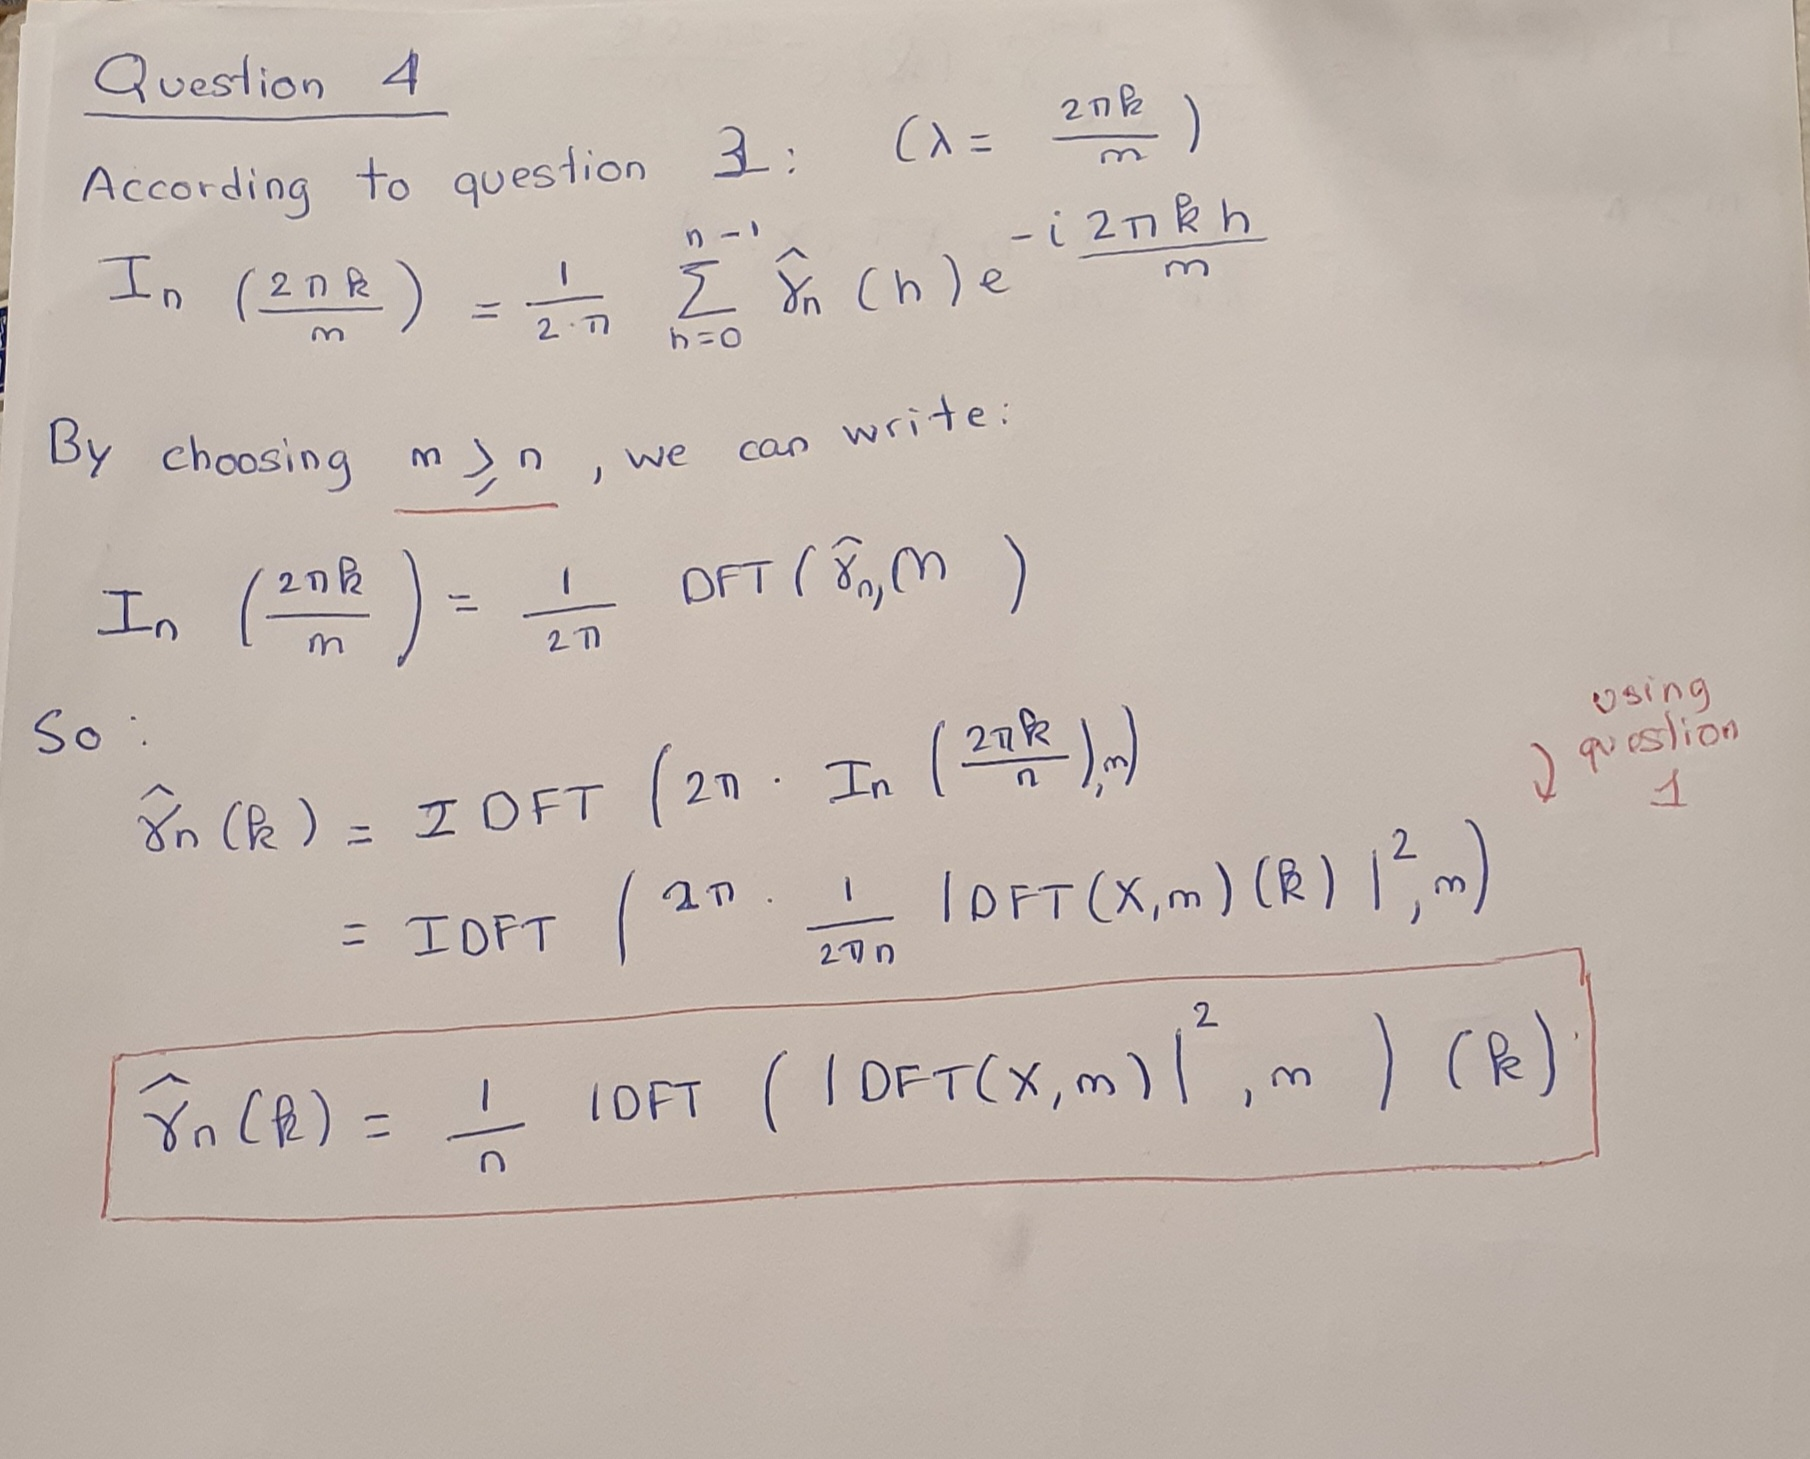

In [7]:

from IPython.display import Image
image_path =r'C:\Users\manel\OneDrive\Documents\2A\tsia\tp2_monroux_wafra\q4.jpg' #'photo1.jpg'
Image(filename=image_path , width=300, height=200)

QUESTION 5

c:\Users\manel\AppData\Local\Programs\Python\Python312\Lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\manel\AppData\Local\Programs\Python\Python312\Lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


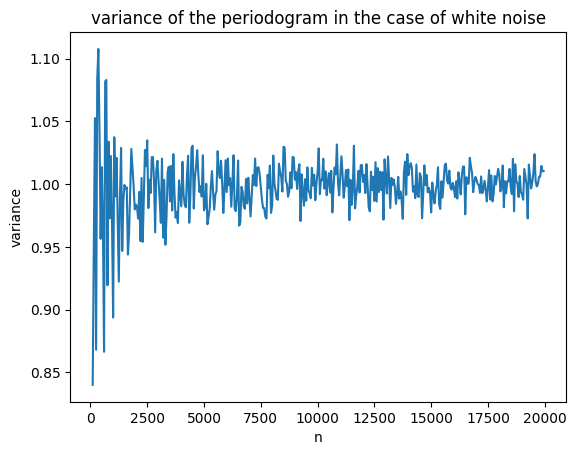

In [ ]:
variance = []
for n in np.arange(100, 20000, 50):
    X=compute_first_variable(n)
    variance.append(1/n*np.fft.ifft(np.abs(np.fft.fft(X, n))**2, n)[0]) ## variance of the periodogram ( k = 0 in the covariance fonction)

plt.title('variance of the periodogram in the case of white noise')
plt.xlabel('n')
plt.ylabel('variance')
plt.plot(np.arange(100, 20000, 50), variance)

We notice that the variance does not depends on n ( when n is big enough) and is close to sigma witch is close to the theory.